In [14]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np

### ランダムにXを作成する

In [15]:
x_data = np.linspace(-10,10,20)

### Yの計算は乱数で二次関数の係数を計算する

SOLUTION= 0.8806046460468863


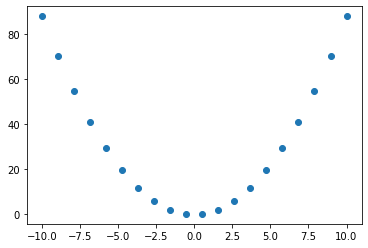

In [63]:
solution = np.random.rand()
y_data = solution * x_data **2
plt.scatter(x_data, y_data)
print("SOLUTION=", solution)

### 標準正規分布の乱数（サイズ：配列長を指定する）

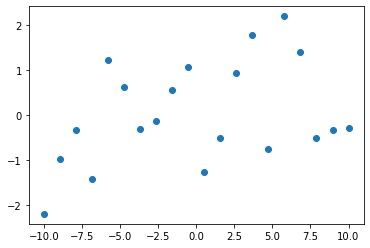

In [65]:
y_data_error_1 = np.random.normal(size=len(x_data))
plt.scatter(x_data, y_data_error_1)

### ランダムエラーを足して観測データ的なものを計算する

In [66]:
y_data_1 = y_data + y_data_error_1

### フィッティングの関数

In [67]:
def func(x, a):
    f=a*x**2
    return f

### プロット

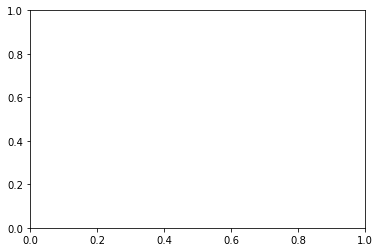

In [68]:
fig=plt.figure(figsize=(6,4))
# plt.rcParam["font.size"]=16
ax1= fig.add_subplot(111)

### poptが最適推定値 : np.random.rand()で得た値の近似値となる
### pcovは共分散となる。

In [70]:
popt, pcov = curve_fit(func, x_data, y_data_1)
print("Optimized solution=",popt)
residuals = y_data_1-func(x_data, popt)
residuals

Optimized solution= [0.87499381]


array([-1.6447449 , -0.53336417,  0.01306747, -1.16753897,  1.41434336,
        0.73238633, -0.23093516, -0.09923511,  0.57073065,  1.0664652 ,
       -1.26659512, -0.50172168,  0.96505421,  1.85593608, -0.63110052,
        2.37844989,  1.66635182, -0.15754251,  0.11381555,  0.26145804])

### 決定係数(r_squared)は１に近いほど、その近似がもっともらしい。
### residualsはデータと近似曲線の差(残差)をとっている。
### rssはresidual sum of squaresの略で残差の２乗の合計、tssはtotal sum of squaresの略で各y_dataとy_dataの平均の差の２乗の合計で、データそのもののばらつきを表す。

In [27]:
rss=np.sum(residuals**2)
tss=np.sum((y_data_1-np.mean(y_data_1))**2)

In [28]:
r_squared=1-(rss/tss)

In [72]:
ax1.plot(x_data, y_data_1,'mo')

In [73]:
ax1.plot(x_data, func(x_data, popt), 'g-')

In [74]:
ax1.annotate("$R^2$="+str(r_squared)[0:5], xy=(0.6, 0.6), xycoords='axes fraction')
ax1.annotate("$y$="+str(popt)[1:6], xy=(0.6, 0.7), xycoords='axes fraction')

fig.savefig("fitting.png", dpi=200, transparent=False, bbox_inches='tight')

In [ ]:
### Curve fitting
# Sの計算

In [75]:
#s_list.append(1./bin_stats.d_min**2)
#cc_list.append(bin_stats.cc_one_half)

  Initial d0, r = [0.013393299600076073, 1.0]

[1.69620781 0.06480642]


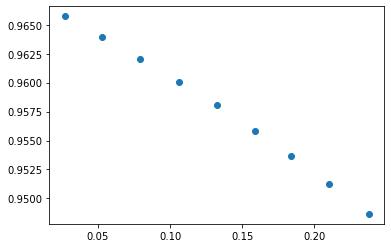

In [102]:
import scipy
cc_half = [99.8, 99.9, 99.9, 99.8, 99.1, 97.3, 90.8, 78.4, 54.1]
dmin_list=[6.11, 4.34, 3.55, 3.07, 2.75, 2.51, 2.33, 2.18, 2.05]

s_list=[]
cc_list=[]

for cchalf, dmin in zip(cc_half, dmin_list):
    s_list.append(1./dmin**2)
    cc_list.append(cchalf)
    
def resolution_fitted(d0, r, cchalf_min=0.5):
    return 1./np.sqrt((np.arctanh(1.-2.*cchalf_min)*r + d0))

def fun(x, s, cc):
    d0, r = x
    return fun_ed_aimless(s,d0,r) - cc

def fun_ed_aimless(s, d0, r):
    # CC1/2 fitting equation used in Aimless, suggested by Ed Pozharski
    return 0.5 * (1 - np.tanh((s-d0)/r))

x0 = [0.5*min(s_list), 1.] #Initial d0, r
print("  Initial d0, r = %s\n" % x0)

lsq = scipy.optimize.least_squares(fun, x0, args=(s_list, cc_list), loss="soft_l1", f_scale=.3)
print(lsq.x)
# plt.scatter(s_list, cc_list)

d0=lsq.x[0]
r=lsq.x[1]
estimated_values = fun_ed_aimless(s_list, d0, 1)
plt.scatter(s_list, estimated_values)